### 1. Import bibliotek

In [546]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from array import array
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### 2. Przygotowanie danych do analizy

In [654]:
data

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Region Index,,,,,,,,,,,,,,,,,,,,,
0,8134.996146,5949.589184,6140.597465,6546.473614,5539.747886,6281.080961,6027.106564,6914.119291,6684.238960,8058.744788,...,7579.317030,7732.100876,8118.890602,10622.260070,15273.326306,11701.428820,11158.356891,11121.001267,11221.276154,11321.551040
1,10165.554236,9855.868360,11172.833793,11333.175512,10568.860178,10914.311696,11512.700149,12964.255598,13250.695731,13819.897815,...,21673.993992,23194.825170,24122.367680,26126.905160,23878.366909,23886.158800,25548.026548,25842.166795,26385.663882,26918.434969
2,15224.636830,15582.137756,16482.423651,16956.358353,17468.531500,17641.326842,17975.703450,18120.101846,18490.425632,18621.798477,...,12093.114739,11070.186325,10977.732531,10399.276262,10269.395626,9996.251475,9623.996577,9470.824292,9374.493102,9349.584374
3,3410.067153,3252.959625,3960.602021,3241.556976,3514.667037,3820.624617,4383.710506,4279.725322,3625.227162,4213.019527,...,4564.501346,4601.761800,4202.574862,3950.053704,4996.650852,3940.056494,4022.752067,3541.508586,3631.195073,3721.592928
4,12374.956820,12694.444044,12989.432609,13638.880296,13694.135041,13909.338800,14570.865697,14834.654544,15071.459318,16088.149316,...,14214.338212,14035.550647,13912.824882,13465.481709,13473.408879,13189.827421,13175.372112,13127.829309,12913.249365,12677.389422
5,16786.634850,14472.563125,16217.372550,15288.932625,16380.546992,17592.200075,19403.470142,17890.281350,19113.056200,19841.199958,...,28083.248750,30904.736225,31552.034050,26817.918418,27600.191147,27802.153537,27614.416969,29343.857679,29749.787325,30155.716971


In [682]:
raw_data = pd.read_csv("..\..\data\cleaned\df_continents_co2.csv")
raw_data.pop("Continent")
raw_data.pop("Country Name")
raw_data.pop("Country Index")

data = raw_data[raw_data.columns].copy().groupby(by="Region Index", axis=0).mean()

tempX = [int(stri) for stri in data.columns.to_numpy()]
tempY_0 = [int(flo) for flo in data.iloc[0, :].to_numpy()]
tempY_1 = [int(flo) for flo in data.iloc[1, :].to_numpy()]
tempY_2 = [int(flo) for flo in data.iloc[2, :].to_numpy()]
tempY_3 = [int(flo) for flo in data.iloc[3, :].to_numpy()]
tempY_4 = [int(flo) for flo in data.iloc[4, :].to_numpy()]
tempY_5 = [int(flo) for flo in data.iloc[5, :].to_numpy()]
x = np.array(tempX).reshape(-1, 1)
y_0 = np.array(tempY_0)
y_1 = np.array(tempY_1)
y_2 = np.array(tempY_2)
y_3 = np.array(tempY_3)
y_4 = np.array(tempY_4)
y_5 = np.array(tempY_5)

### 4. Trenowanie modelu

In [683]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(x, y_0, test_size = 0.1, random_state = 0)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x, y_1, test_size = 0.1, random_state = 0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x, y_2, test_size = 0.1, random_state = 0)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(x, y_3, test_size = 0.1, random_state = 0)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(x, y_4, test_size = 0.1, random_state = 0)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(x, y_5, test_size = 0.1, random_state = 0)

In [675]:
def model(X_train, y_train):
    
    f_0 = RandomForestClassifier (n_estimators=20, random_state=0)
    f_1 = RandomForestClassifier (n_estimators=20, random_state=0)
    f_2 = RandomForestClassifier (n_estimators=20, random_state=0)
    f_3 = RandomForestClassifier (n_estimators=20, random_state=0)
    f_4 = RandomForestClassifier (n_estimators=20, random_state=0)
    f_5 = RandomForestClassifier (n_estimators=20, random_state=0)
    f_0.fit(X_train_0,y_train_0)
    f_1.fit(X_train_1,y_train_1)
    f_2.fit(X_train_2,y_train_2)
    f_3.fit(X_train_3,y_train_3)
    f_4.fit(X_train_4,y_train_4)
    f_5.fit(X_train_5,y_train_5)
   
    return f_0, f_1, f_2, f_3, f_4, f_5, f_0, f_1, f_2, f_3, f_4, f_5

forest = model(X_train,y_train)

Random Forest: 1.0
Regresja logistyczna: 0.029411764705882353
Decision Tree: 1.0


### 5. Eksport modelu

In [649]:
filename = "continents_model_region_0.sv"
pickle.dump(forest, open(filename,'wb'))

### 6. Testowanie modelu

In [676]:
loaded_model = pickle.load(open(filename, 'rb'))
result = forest.predict(np.array([2020]).reshape(-1,1))
result

array([11321])

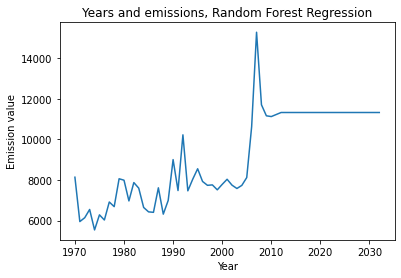

In [679]:
plotX = x
plotY = y

for number in range(20):
    year = number + 2013
    emission = forest.predict(np.array([year]).reshape(-1,1))
    plotY = np.append(plotY, emission)
    plotX = np.append(plotX, np.array(year))
    
plt.plot(plotX, plotY)
plt.title('Years and emissions, Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('Emission value')
plt.show()

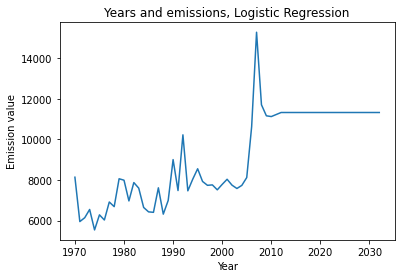

In [680]:
plotX = x
plotY = y

for number in range(20):
    year = number + 2013
    emission = lreg.predict(np.array([year]).reshape(-1,1))
    plotY = np.append(plotY, emission)
    plotX = np.append(plotX, np.array(year))
    
plt.plot(plotX, plotY)
plt.title('Years and emissions, Logistic Regression')
plt.xlabel('Year')
plt.ylabel('Emission value')
plt.show()

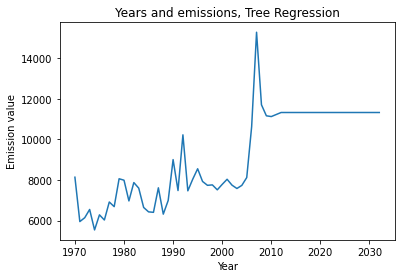

In [681]:
plotX = x
plotY = y

for number in range(20):
    year = number + 2013
    emission = tree.predict(np.array([year]).reshape(-1,1))
    plotY = np.append(plotY, emission)
    plotX = np.append(plotX, np.array(year))
    
plt.plot(plotX, plotY)
plt.title('Years and emissions, Tree Regression')
plt.xlabel('Year')
plt.ylabel('Emission value')
plt.show()